# Analyze Latencies and Utilization

In this notebook we explore the latency and resource usage of a specific connection pooler for long running experiments. Input files are `q*.csv` and `utilization.csv`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

These are the files that we read to generate the plots. Change the `plot` variable to generate the graphs for a specific connection pooler.

In [2]:
plot = 0

if plot == 0:
    directory = "./002-results-detailed-latencies/pgbouncer-1707314911"
    config = "(PgBouncer, clients = 50)"
elif plot == 1:
    directory = "./002-results-detailed-latencies/pgcat-1707322429"
    config = "(PgCat, clients = 1250)"
elif plot == 2:
    directory = "./002-results-detailed-latencies/supavisor-1707327679"
    config = "(Supavisor, clients = 100)"

These are just constants. No need to change them.

In [3]:
colors = ["#412e93", "#f9457a", "#da38ca", "#44d3ec", "#e9fc87",
            "#1f78b4",  # Blue
            "#33a02c",  # Green
            "#e31a1c",  # Red
            "#ff7f00",  # Orange
            "#6a3d9a",  # Purple
            "#a6cee3",  # Light Blue
            "#b2df8a",  # Light Green
            "#fb9a99",  # Light Red
            "#fdbf6f",  # Light Orange
            "#cab2d6"   # Light Purple
        ]
figsize = (16,9)

In [4]:
all_data = [
    {
    "label": "p50",
    "dataframe" : pd.read_csv(directory + '/q50.csv').set_index('time_epoch'),
    },
    {
    "label": "p90",
    "dataframe" : pd.read_csv(directory + '/q90.csv').set_index('time_epoch'),
    },
    {
    "label": "p95",
    "dataframe" : pd.read_csv(directory + '/q95.csv').set_index('time_epoch'),
    },
    {
    "label": "p99",
    "dataframe" : pd.read_csv(directory + '/q99.csv').set_index('time_epoch'),
    },
]


## Latencies for p50, p90, p95 and p99

Text(0.5, 0, 'Timestamp')

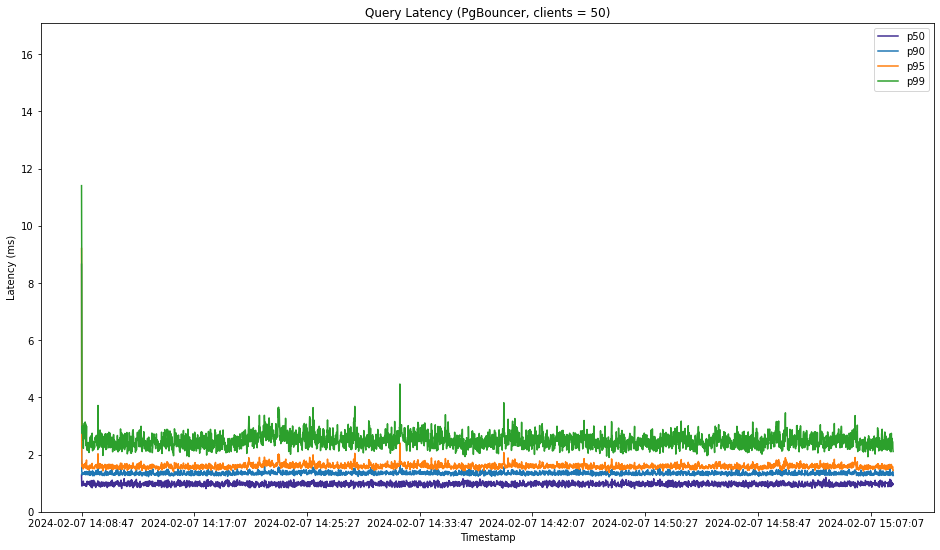

In [5]:
title = f"Query Latency {config}"
max_y = all_data[3]['dataframe']['time'].max() * 1.5
for i, dp in enumerate(all_data):
    if i == 0:
        ax = dp['dataframe'].plot.line(y='time', figsize=figsize, ylim=(0,max_y),title=title, label=dp['label'], color=colors)
    else:
        ax = dp['dataframe'].plot.line(ax=ax, y='time', label=dp['label'])

ax.set_ylabel('Latency (ms)')
ax.set_xlabel('Timestamp')

In [6]:
max_ts = all_data[0]['dataframe'].index.max()
min_ts = all_data[0]['dataframe'].index.min()

## CPU Utilization

In [7]:
df = pd.read_csv(directory + '/utilization.csv')

In [8]:
df['ts'] = pd.to_datetime(df['ts'],unit='s')
df['vsize'] /= (1024*1024)

In [9]:
df = df[df['ts'] <= max_ts]
df = df[df['ts'] >= min_ts]

Text(0.5, 0, 'Timestamp')

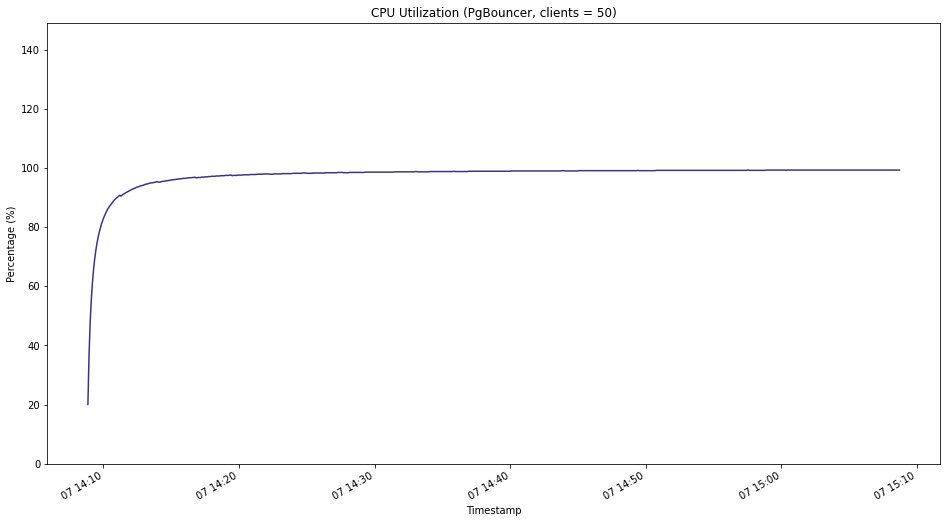

In [10]:
title = f"CPU Utilization {config}"
max_y = df['cpu'].max() * 1.5
ax = df.set_index('ts').plot.line(y='cpu', figsize=figsize, ylim=(0,max_y),title=title, legend=False, color=colors)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Timestamp')

## Memory usage

Text(0.5, 0, 'Timestamp')

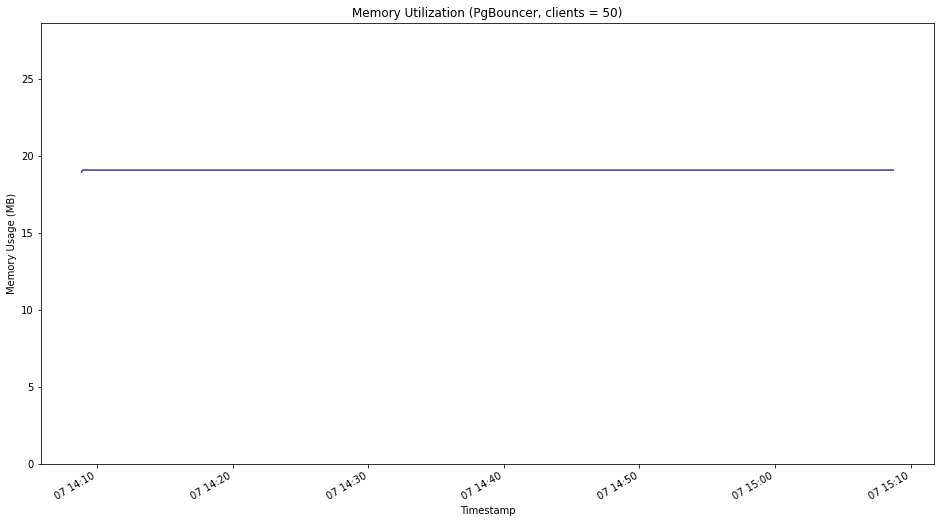

In [11]:
title = f"Memory Utilization {config}"
max_y = df['vsize'].max() * 1.5
ax = df.set_index('ts').plot.line(y='vsize', figsize=figsize, ylim=(0,max_y),title=title, legend=False, color=colors)
ax.set_ylabel('Memory Usage (MB)')
ax.set_xlabel('Timestamp')